In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils import to_categorical
import numpy as np
from sklearn.metrics import f1_score
from nlp_exploration.sequential_model_framework import NLPSequentialModel, transform_data
from nlp_exploration.lr_model_framework.py import lr_model_for_nlp
from keras.datasets import reuters


In [3]:
# https://keras.io/api/datasets/reuters/
# load in train /test image
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=5000, test_split=0.3)

In [9]:
x_train = transform_data(train_data, buffer_size=5000)
x_test = transform_data(test_data, buffer_size=5000)

In [10]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### Logistic Regression model

In [12]:
lr_model = lr_model_for_nlp()

In [13]:
lr_model.fit(x_train, train_labels)

LogisticRegression(C=0.8, class_weight='balanced')

In [17]:
predictions = lr_model.predict(x_test)
f1_score(test_labels, predictions, average='weighted')

0.8024671576671637

In [18]:
label_name = reuters.get_label_names()

In [28]:
individual_pred = lr_model.predict_proba(x_test[45:46,:])
individual_test_labels = one_hot_test_labels[45:46,:]

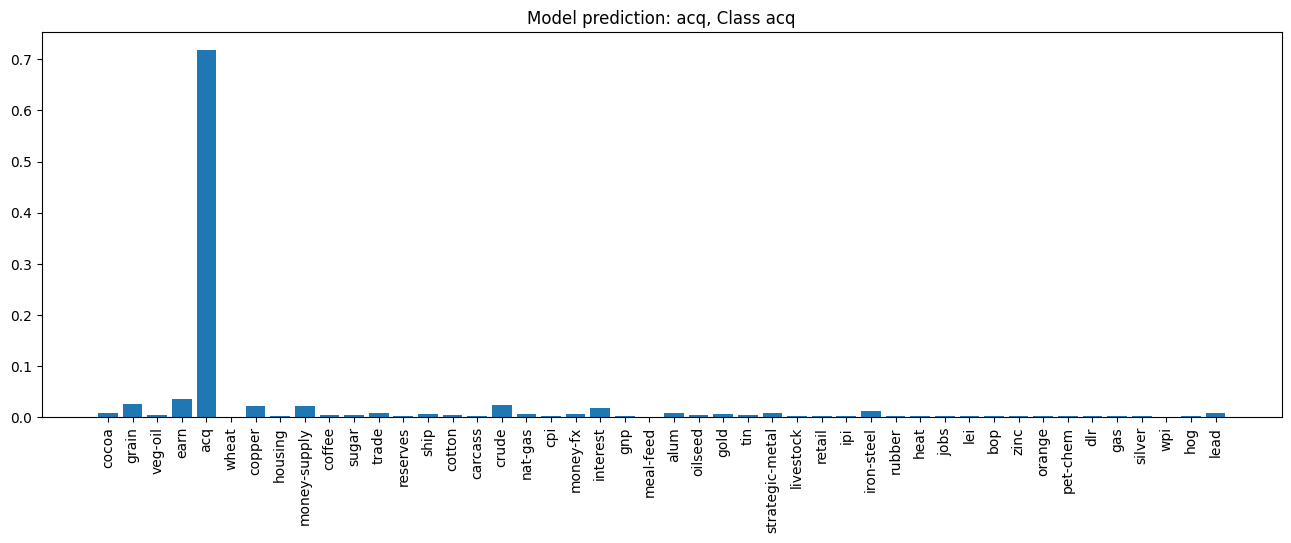

In [29]:
fig, axes = plt.subplots(figsize=(16,5))
fig.subplots_adjust(hspace=0.5, wspace=-0.2)
for i, (prediction, label) in enumerate(zip(individual_pred, individual_test_labels)):
    plt.bar(np.arange(len(prediction)), prediction)
    plt.xticks(np.arange(len(prediction)))
    axes.set_xticklabels(label_name, rotation=90)
    pred_inx = np.argmax(prediction)
    plt.title(f"Model prediction: {label_name[pred_inx]}, Class {label_name[np.argmax(label)]}")
    
plt.show()

### Sequential model

In [27]:
model = NLPSequentialModel()

In [28]:
NumEpochs = 10
BatchSize = 64

validation_train, validation_label = x_train[3000:], one_hot_train_labels[3000:]
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    x_train[:3000], 
    one_hot_train_labels[:3000], epochs=NumEpochs, 
    batch_size=BatchSize, 
    validation_data=(validation_train, validation_label)
    )

results = model.evaluate(validation_train, validation_label)

Epoch 1/10
47/47 [==============================] - 0s 5ms/step - loss: 3.0253 - accuracy: 0.4760 - val_loss: 2.3019 - val_accuracy: 0.6341
Epoch 2/10
47/47 [==============================] - 0s 3ms/step - loss: 2.2094 - accuracy: 0.6357 - val_loss: 2.0266 - val_accuracy: 0.6845
Epoch 3/10
47/47 [==============================] - 0s 3ms/step - loss: 1.8693 - accuracy: 0.6983 - val_loss: 1.8714 - val_accuracy: 0.6938
Epoch 4/10
47/47 [==============================] - 0s 3ms/step - loss: 1.6258 - accuracy: 0.7357 - val_loss: 1.7703 - val_accuracy: 0.7102
Epoch 5/10
47/47 [==============================] - 0s 3ms/step - loss: 1.4180 - accuracy: 0.7743 - val_loss: 1.6852 - val_accuracy: 0.7335
Epoch 6/10
47/47 [==============================] - 0s 3ms/step - loss: 1.2723 - accuracy: 0.7977 - val_loss: 1.6479 - val_accuracy: 0.7405
Epoch 7/10
47/47 [==============================] - 0s 3ms/step - loss: 1.1324 - accuracy: 0.8237 - val_loss: 1.6501 - val_accuracy: 0.7464
Epoch 8/10
47/47 [==

1/1 [==============================] - 0s 14ms/step


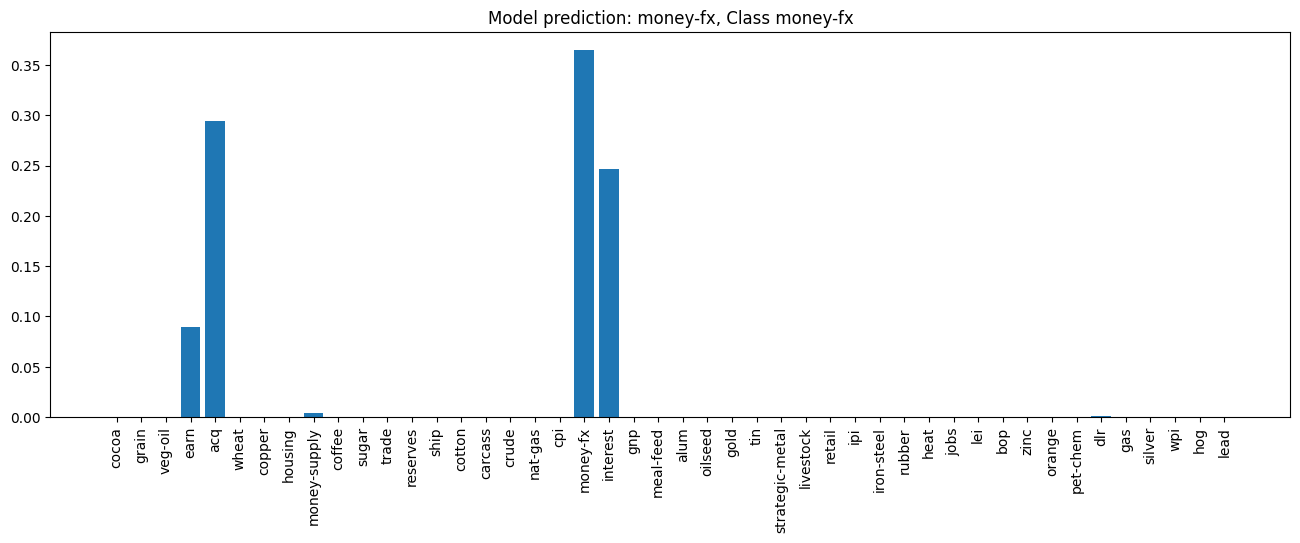

In [16]:
num_test_images = one_hot_test_labels.shape[0]

random_inx = [2000]
random_test_images = x_test[random_inx, ...]
random_test_labels = one_hot_test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(figsize=(16,5))
fig.subplots_adjust(hspace=0.5, wspace=-0.2)

for i, (prediction, label) in enumerate(zip(predictions, random_test_labels)):
    plt.bar(np.arange(len(prediction)), prediction)
    plt.xticks(np.arange(len(prediction)))
    axes.set_xticklabels(label_name, rotation=90)
    pred_inx = np.argmax(prediction)
    plt.title(f"Model prediction: {label_name[pred_inx]}, Class {label_name[np.argmax(label)]}")
    
plt.show()
